In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
X_train = np.loadtxt('dataset/train_X.csv',delimiter=',').T
y_train = np.loadtxt('dataset/train_label.csv', delimiter=',').T
X_test = np.loadtxt('dataset/test_X.csv', delimiter=',').T
y_test = np.loadtxt('dataset/test_label.csv', delimiter=',').T

In [3]:
X_train.shape

(784, 1000)

In [4]:
y_train.shape

(10, 1000)

In [5]:
X_test.shape

(784, 350)

In [6]:
y_test.shape

(10, 350)

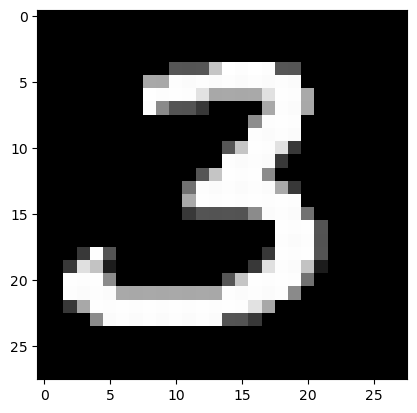

In [9]:
index = random.randrange(0,X_train.shape[1])
plt.imshow(X_train[:,index].reshape(28,28), cmap='gray')

# Model

In [10]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x,0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis=0)

In [11]:
def derivative_tanh(x):
    return (1-np.power(np.tanh(x),2))

def derivative_relu(x):
    return np.array(x>0, dtype='float32')

### Initialize Prameters

In [12]:
## n_x = num of neurons in input layer, n_h = number of neurons in hidden layer, n_y = num of neurons in output layer 
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.001
    b1 = np.zeros((n_h,1))

    w2 = np.random.randn(n_y,n_h)*0.001
    b2 = np.zeros((n_y,1))

    parameters = {'w1':w1, 'b1':b1, 'w2':w2, 'b2':b2}

    return parameters

### Forward propagation

In [13]:
def forward_propagation(x, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1,x)+b1
    a1 = relu(z1)

    z2 = np.dot(w2, a1)+b2
    a2= softmax(z2)

    forward_cache = {
        'z1':z1,
        'a1':a1,
        'z2':z2,
        'a2':a2
    }

    return forward_cache

### Cost function

In [14]:
def cost_function(a2, y):
    epsilon = 1e-8
    m= y.shape[1]
    cost = -(1/m) * np.sum(y * np.log(a2+epsilon))
    return cost

### Backward propagation

In [16]:
def backward_propagation(x, y, parameters, forward_cache):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    z1 = forward_cache['z1']
    m = x.shape[1]

    dz2 = (a2-y)
    dw2 = (1/m)*(np.dot(dz2, a1.T))
    db2 = (1/m)*np.sum(dz2, axis=1, keepdims=True)

    dz1 = np.dot(w2.T, dz2)*derivative_relu(z1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis=1, keepdims=True)

    gradients = {
        "dw1":dw1,
        "db1":db1,
        "dw2":dw2,
        "db2":db2
    }

    return gradients

### Update Parameters

In [17]:
def update_parameters(parameters, gradients, learning_rate):
    w1 = parameters['w1']
    b1 = parameters['b1']

    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']

    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate*dw1
    w2 = w2 - learning_rate*dw2
    b1 = b1 - learning_rate*db1
    b2 = b2 - learning_rate*db2

    parameters = {
        "w1":w1,
        "w2":w2,
        "b1":b1,
        "b2":b2
    }

    return parameters

# Complete Model

In [18]:
def model(x, y, n_h, learning_rate, iterations):
    n_x = x.shape[0]
    n_y = y.shape[0]
    cost_list = []
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(iterations):
        forward_cache = forward_propagation(x, parameters)
        cost = cost_function(forward_cache['a2'], y)
        gradients = backward_propagation(x, y, parameters, forward_cache)
        parameters = update_parameters(parameters, gradients, learning_rate)

        cost_list.append(cost)

        if(i%(iterations/10)==0):
            print(f'Cost after {i} iterations is {cost}')

    return parameters, cost_list

In [19]:
iterations=100
n_h = 100
learning_rate=0.005
parameters, cost_list = model(X_train, y_train, n_h, learning_rate, iterations)

Cost after 0 iterations is 2.3019733153604363
Cost after 10 iterations is 3.4779998539744765
Cost after 20 iterations is 1.7149705237598483
Cost after 30 iterations is 4.024382306044075
Cost after 40 iterations is 1.7561763986411876
Cost after 50 iterations is 1.4196013060272679
Cost after 60 iterations is 0.8391661608580939
Cost after 70 iterations is 0.827417311134414
Cost after 80 iterations is 0.5699648596344387
Cost after 90 iterations is 0.34539370819669557


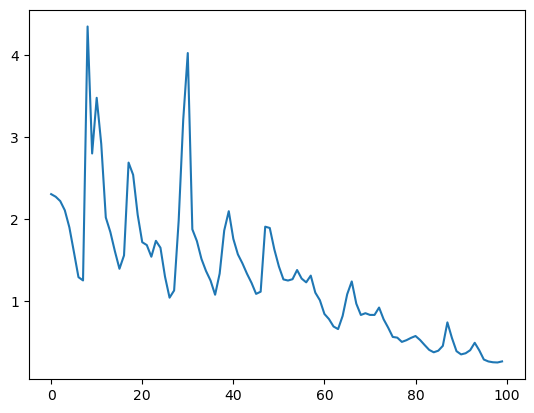

In [20]:
t = np.arange(0, iterations)
plt.plot(t, cost_list)
plt.show()

In [21]:
forward_cache = forward_propagation(X_train, parameters)

In [23]:
a_out = forward_cache['a2']

In [24]:
a_out

array([[7.82385079e-01, 9.75340800e-01, 9.96937479e-01, ...,
        1.34467664e-06, 8.75473858e-06, 9.78442680e-07],
       [7.30572767e-05, 3.85542949e-07, 7.45680028e-10, ...,
        7.69422763e-05, 3.18422929e-04, 5.17963995e-06],
       [2.12585438e-04, 1.54005217e-06, 5.83745996e-09, ...,
        3.03221204e-05, 1.33192303e-04, 6.87195686e-06],
       ...,
       [1.92929217e-04, 2.38475129e-06, 9.56741083e-09, ...,
        2.44865476e-03, 5.25459209e-03, 2.55081403e-03],
       [9.51460407e-03, 3.10155723e-04, 8.13235869e-06, ...,
        1.53940524e-03, 4.41943469e-03, 1.52262729e-05],
       [1.66935850e-03, 8.19195339e-05, 8.70608542e-07, ...,
        9.85725054e-01, 9.57886766e-01, 9.96808200e-01]], shape=(10, 1000))

In [25]:
a_out = np.argmax(a_out,0)

In [26]:
a_out

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 9, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,

In [28]:
y_out = np.argmax(y_train,0)
y_out

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [29]:
acc = np.mean(a_out==y_out)*100
acc

np.float64(90.3)